# MDP

- Set the grid size and initialize grid
- Initialize start and goal points
- Add obstacles to the grid by randomly selecting cells and no obstacles on start and goal
- Initialize actions, discount factor and state values
- Each state is a grid cell, and agent performs an action to get from one state to another
- Reward function: Goal state has high reward, obstacles have negative reward or penalty
- Transition Function: Gives likelihood of transitioning from one state to another given a specific action.
- Goal is to maximize cumulative rewards

In [1]:
import numpy as np
import random

In [2]:
grid_size = 100
grid = np.zeros((grid_size, grid_size))

In [3]:
start = (random.randint(0, grid_size - 1), random.randint(0, grid_size - 1))
goal = (random.randint(0, grid_size - 1), random.randint(0, grid_size - 1))
while goal == start:
    goal = (random.randint(0, grid_size - 1), random.randint(0, grid_size - 1))

In [4]:
num_obstacles = int(grid_size * grid_size * 0.4)
for _ in range(num_obstacles):
    x, y = random.randint(0, grid_size - 1), random.randint(0, grid_size - 1)
    if (x, y) != start and (x, y) != goal:
        grid[x, y] = -1

In [5]:
actions = ["up", "down", "left", "right"]
gamma = 0.9 
state_values = np.zeros((grid_size, grid_size))

In [6]:
def reward(state):
    if state == goal:
        return 100
    elif grid[state] == -1:
        return -100
    else:
        return -1

In [7]:
#Transition function; Returns new state and reward for the current action
def transition(state, action):
    x, y = state
    if action == "up" and x > 0:
        x -= 1
    elif action == "down" and x < grid_size - 1:
        x += 1
    elif action == "left" and y > 0:
        y -= 1
    elif action == "right" and y < grid_size - 1:
        y += 1
    return (x, y), reward((x, y))

In [8]:
def MDP():
    threshold = 0.01
    for i in range(1000):
        delta = 0
        new_state_val = np.copy(state_values)
        
        for x in range(grid_size):
            for y in range(grid_size):
                state = (x, y)
                if state == goal or grid[state] == -1:
                    continue
                
                max_value = float('-inf')
                for action in actions:
                    next_state, reward = transition(state, action)
                    value = reward + gamma * state_values[next_state]
                    max_value = max(max_value, value)
                
                new_state_val[state] = max_value
                delta = max(delta, abs(state_values[state] - new_state_val[state]))
        
        state_values[:, :] = new_state_val
        if delta < threshold:
            break
    return state_values

# Q-Learning

- Initialize q-values to zeros.
- Initialize learning rate and Epsilon-greedy parameter for exploration
- We use the same discount factor 'gamma' from MDP
- Start at an initial state, pick action using epsilon or 1-epsilon
- Use action to observe the next state and the reward
- Update Q-value based on the observed reward.
- Repeat until convergence

In [9]:
import random

In [10]:
q_values = np.zeros((grid_size, grid_size, len(actions)))
alpha = 0.1  
epsilon = 0.1

In [11]:
def q_learning(episodes=1000):
    for episode in range(episodes):
        state = start
        while state != goal:
            if random.uniform(0, 1) < epsilon:
                action = random.choice(actions)
            else:
                action = actions[np.argmax(q_values[state[0], state[1], :])]  # Exploit
            
            next_state, reward = transition(state, action)
            action_index = actions.index(action)
            
            q_values[state[0], state[1], action_index] += alpha * (reward + gamma * np.max(q_values[next_state[0], next_state[1], :]) - q_values[state[0], state[1], action_index])
            
            state = next_state
    return q_values

## Comparing MDP and Q-Learning Policies

In [12]:
mdp_sval = MDP()
q_qval = q_learning()

In [13]:
mdp_pol = np.argmax(mdp_sval, axis=1)
q_learning_pol= np.argmax(q_qval, axis=2)

In [14]:
print("Dynamic Programming Policy:\n", mdp_pol)
print("Q-Learning Policy:\n", q_learning_pol)

Dynamic Programming Policy:
 [57 57 56 56 56 55 54 53 53 52 52 52 52 52 45  3  4  0  1  1 10  6  1  1
  0  0  2  5  0  0  0  0  4  0  0  3  0  0  1  0  6  6  2  0 11  0  6  0
 10  0  6  0  0  1  0  3  6  2  2  3  2  2 13  1  2  2  1  0  1  3  0  0
  0  2  2  2  0  0  1  3  4  3  2  3  0  3  0  0  1  2  2  2  0  0  6  3
  0  0  1  0]
Q-Learning Policy:
 [[2 2 2 ... 0 2 0]
 [2 0 3 ... 0 2 3]
 [1 0 1 ... 0 1 3]
 ...
 [1 0 3 ... 1 1 1]
 [2 1 0 ... 3 1 3]
 [3 1 0 ... 0 0 1]]


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

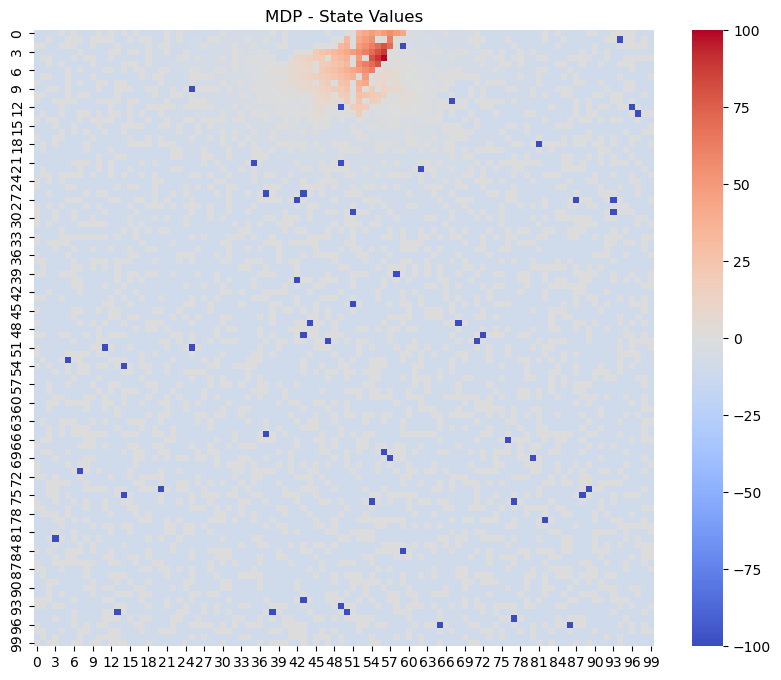

In [16]:
# Map action index to directions
action_map = {0: 'Up', 1: 'Down', 2: 'Left', 3: 'Right'}

# Visualize DP State Values
plt.figure(figsize=(10,8))
sns.heatmap(mdp_sval, cmap="coolwarm", annot=False, cbar=True)
plt.title("MDP - State Values")
plt.show()

In [17]:
# Visualize Q-Learning Policy
q_vis = np.argmax(q_qval, axis=2)  # Extracting the best action from Q-values
action_indices = {
    'Up': 0,
    'Down': 1,
    'Left': 2,
    'Right': 3
}
q_vis = np.vectorize(lambda x: action_indices[action_map[x]])(q_vis)

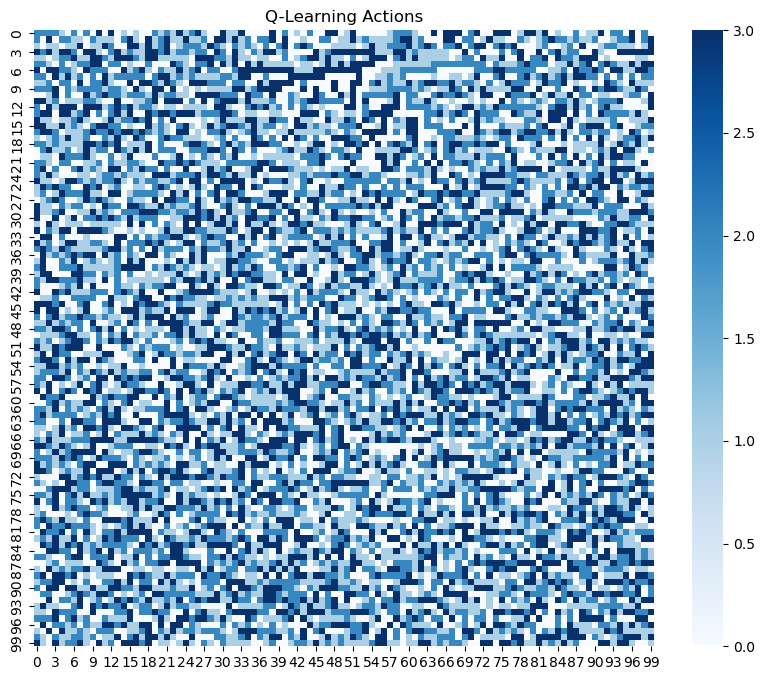

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(q_vis, cmap="Blues", annot=False, cbar=True)
plt.title("Q-Learning Actions")
plt.show()

## Benchmarking DP vs Q-Learning

- DP converges faster on small grids but becomes inefficient on larger grids
- Q-learning takes longer to converge due to the exploration of states, but it can handle larger state spaces better

- DP does no exploration, fully exploitative.
- Q-learning starts with exploration, but starts exploiting as the agent learns and improves its Q-values.